In [201]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [203]:
file_path = '/content/drive/MyDrive/sao-paulo-properties-april-2019.csv'
data = pd.read_csv(file_path)

In [204]:
data

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265000,420,51,2,1,0,1,0,0,0,0,Jabaquara/São Paulo,sale,apartment,-23.653004,-46.635463
13636,545000,630,74,3,2,1,2,0,0,1,0,Jabaquara/São Paulo,sale,apartment,-23.648930,-46.641982
13637,515000,1100,114,3,3,1,1,0,0,1,0,Jabaquara/São Paulo,sale,apartment,-23.649693,-46.649783
13638,345000,48,39,1,2,1,1,0,1,1,0,Jabaquara/São Paulo,sale,apartment,-23.652060,-46.637046


In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  int64  
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation Type  13640 non-null  object 
 13  Property Type     13640 non-null  object 
 14  Latitude          13640 non-null  float64
 15  Longitude         13640 non-null  float64
dtypes: float64(2), int64(11), object(3)
memo

In [206]:
data.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,1.364000e+04,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.00000,13640.000000,13640.000000,13640.000000
mean,2.877378e+05,689.882331,84.373900,2.312023,2.073680,0.980792,1.393182,0.354179,0.146774,0.51217,0.015616,-22.077047,-43.597088
std,5.908214e+05,757.649363,58.435676,0.777461,0.961803,0.834891,0.829932,0.478281,0.353894,0.49987,0.123988,5.866633,11.487288
min,4.800000e+02,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-46.749039,-58.364352
25%,1.858750e+03,290.000000,50.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,-23.594552,-46.681671
50%,8.100000e+03,500.000000,65.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000,-23.552813,-46.637255
75%,3.600000e+05,835.000000,94.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.00000,0.000000,-23.517640,-46.560040
max,1.000000e+07,9500.000000,880.000000,10.000000,8.000000,6.000000,9.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000


In [207]:
# Mostrando todos os dados individualmente
for i in data.columns:
  print(i)
  print(data[i].unique())
  print('\n')

Price
[    930    1000    1300 ... 1455000 1012000  559000]


Condo
[ 220  148  100 ... 1386  996   48]


Size
[ 47  45  48  55  50  52  40  65 100  38  56  54  43  80  46  67  68  63
  59 230 113  36 107 150  60 155  66  57  85 114  44  51 115  73  64  58
  96  62  53  70 105 125 126  98  49  75  72 106  77  61 198  35  78  82
  30  92 152  74 245 132  87 120 130 131  90 116 223 443 250  42  41  88
 101 110  84  95 136  69  37 164 140 144 190 112  97  34  31 134 103  32
  39 154 176  83  86 135 118  93 142  79  94  76 122  89 248 160 139 117
 210 147 242 180 325 165 218 200 163 149 184 133 236  81 280  91 185 181
 189 340 168 220 390 278 111 213 170 127 124 288 188 187 211 102 215 146
 167 289 173 225 161 178 263 209 300 240 158 195 270 306 255 335 177 393
 373 175 400  71 271 420 273 309 370 193 186 128 166  99 196 145 243 119
 137 222 148 157 109 290 277 153 598 269  33 104 377 171 234 156 203 397
 162 251 143 183 151 159 108 123 207 291 265 333 201 227 138 440 304 257
 320 194 192 

In [208]:
# Removendo colunas desnecessárias
data = data.drop(columns=['Latitude', 'Longitude', 'Property Type', "New"])

In [210]:
# Substituindo os valores 0 por a média dos valores
condo_filtrado = data[data['Condo'] > 0]
media_condo = condo_filtrado['Condo'].mean()
data['Condo'] = data['Condo'].replace(0, media_condo)

In [211]:
data.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool
count,1.364000e+04,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.00000
mean,2.877378e+05,806.824573,84.373900,2.312023,2.073680,0.980792,1.393182,0.354179,0.146774,0.51217
std,5.908214e+05,702.388963,58.435676,0.777461,0.961803,0.834891,0.829932,0.478281,0.353894,0.49987
min,4.800000e+02,1.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.858750e+03,416.000000,50.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.00000
50%,8.100000e+03,652.000000,65.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.00000
75%,3.600000e+05,835.000000,94.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.00000
max,1.000000e+07,9500.000000,880.000000,10.000000,8.000000,6.000000,9.000000,1.000000,1.000000,1.00000


In [212]:
# Instanciando o codificador
label_encoder = LabelEncoder()

# Aplicando o encoder na coluna 'District'
data['District'] = label_encoder.fit_transform(data['District'])

In [213]:
# Separando os dados em dois DataFrames
data_rent = data[data['Negotiation Type'] == 'rent']  # Filtra onde o tipo é "rent"
data_sale = data[data['Negotiation Type'] == 'sale']  # Filtra onde o tipo é "sale"

In [214]:
# Removendo colunas desnecessárias
data_rent = data_rent.drop(columns='Negotiation Type')
data_sale = data_sale.drop(columns='Negotiation Type')

In [215]:
# Salvando os novos DataFrames em arquivos separados (opcional)
data_rent.to_csv('rent_dataset.csv', index=False)
data_sale.to_csv('sale_dataset.csv', index=False)

In [216]:
# Verificando os tamanhos dos datasets
print(f"Imóveis para aluguel: {data_rent.shape[0]}")
print(f"Imóveis para venda: {data_sale.shape[0]}")

Imóveis para aluguel: 7228
Imóveis para venda: 6412


In [217]:
data_rent

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,District
0,930,220.0,47,2,2,1,1,0,0,0,3
1,1000,148.0,45,2,2,1,1,0,0,0,3
2,1000,100.0,48,2,2,1,1,0,0,0,3
3,1000,200.0,48,2,2,1,1,0,0,0,3
4,1300,410.0,55,2,2,1,1,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
11205,3700,595.0,73,1,2,1,1,0,0,1,9
11206,21000,3000.0,208,4,4,3,3,1,1,1,9
11207,3800,710.0,55,1,1,0,1,0,1,1,9
11208,5000,2354.0,205,3,2,1,2,1,0,0,9


In [218]:
data_sale

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,District
4901,732600,1000.000000,74,1,2,1,2,1,0,1,88
4902,1990000,2400.000000,164,4,5,2,3,1,1,1,88
4903,720000,700.000000,70,2,2,1,1,1,0,1,88
4904,1680000,1580.000000,155,3,5,3,2,1,0,1,88
4905,1200000,900.000000,56,2,2,1,2,0,1,1,88
...,...,...,...,...,...,...,...,...,...,...,...
13635,265000,420.000000,51,2,1,0,1,0,0,0,36
13636,545000,630.000000,74,3,2,1,2,0,0,1,36
13637,515000,1100.000000,114,3,3,1,1,0,0,1,36
13638,345000,48.000000,39,1,2,1,1,0,1,1,36


In [219]:
data_rent.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,District
count,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000,7228.000000
mean,3077.669065,896.634716,89.486165,2.304234,2.105562,1.024488,1.452269,0.299806,0.172939,0.487963,46.233121
std,3522.830284,795.542016,63.976416,0.829108,0.998162,0.884241,0.889535,0.458205,0.378220,0.499890,28.399983
min,480.000000,1.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1350.000000,458.000000,52.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000
50%,2000.000000,686.000000,67.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,48.000000
75%,3300.000000,990.000000,100.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,69.000000
max,50000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.000000,1.000000,1.000000,1.000000,95.000000


In [220]:
data_sale.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,District
count,6.412000e+03,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000
mean,6.086241e+05,705.585068,78.611042,2.320805,2.037742,0.931535,1.326575,0.415471,0.117280,0.539457,44.218341
std,7.404515e+05,562.836703,50.872359,0.714743,0.917844,0.772615,0.751658,0.492841,0.321779,0.498480,28.456077
min,4.200000e+04,1.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.500000e+05,380.000000,50.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000
50%,3.800000e+05,613.000000,62.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,44.000000
75%,6.790000e+05,806.824573,87.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,68.000000
max,1.000000e+07,8920.000000,620.000000,6.000000,7.000000,6.000000,7.000000,1.000000,1.000000,1.000000,95.000000


In [221]:
# Padronizando os dados
scaler_standard = StandardScaler()

data_rent_scaled = scaler_standard.fit_transform(data_rent)
data_rent_scaled = pd.DataFrame(data_rent_scaled, columns=data_rent.columns, index=data_rent.index)

data_sale_scaled = scaler_standard.transform(data_sale)
data_sale_scaled = pd.DataFrame(data_sale_scaled, columns=data_sale.columns, index=data_sale.index)

In [222]:
data_rent_scaled

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,District
0,-0.609685,-0.850592,-0.664137,-0.366966,-0.105763,-0.027696,-0.508468,-0.654352,-0.457275,-0.97621,-1.522399
1,-0.589813,-0.941102,-0.695401,-0.366966,-0.105763,-0.027696,-0.508468,-0.654352,-0.457275,-0.97621,-1.522399
2,-0.589813,-1.001443,-0.648505,-0.366966,-0.105763,-0.027696,-0.508468,-0.654352,-0.457275,-0.97621,-1.522399
3,-0.589813,-0.875734,-0.648505,-0.366966,-0.105763,-0.027696,-0.508468,-0.654352,-0.457275,-0.97621,-1.522399
4,-0.504649,-0.611744,-0.539082,-0.366966,-0.105763,-0.027696,-0.508468,1.528230,-0.457275,-0.97621,-1.522399
...,...,...,...,...,...,...,...,...,...,...,...
11205,0.176669,-0.379182,-0.257709,-1.573164,-0.105763,-0.027696,-0.508468,-0.654352,-0.457275,1.02437,-1.311117
11206,5.087833,2.644123,1.852589,2.045431,1.898058,2.234287,1.740052,1.528230,2.186870,1.02437,-1.311117
11207,0.205057,-0.234617,-0.539082,-1.573164,-1.107674,-1.158687,-0.508468,-0.654352,2.186870,1.02437,-1.311117
11208,0.545716,1.832042,1.805694,0.839232,-0.105763,-0.027696,0.615792,1.528230,-0.457275,-0.97621,-1.311117


In [223]:
data_sale_scaled

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,District
4901,207.098481,0.129940,-0.242077,-1.573164,-0.105763,-0.027696,0.615792,1.528230,-0.457275,1.02437,1.470767
4902,564.052092,1.889868,1.164788,2.045431,2.899969,1.103295,1.740052,1.528230,2.186870,1.02437,1.470767
4903,203.521564,-0.247188,-0.304605,-0.366966,-0.105763,-0.027696,-0.508468,1.528230,-0.457275,1.02437,1.470767
4904,476.048577,0.859053,1.024102,0.839232,2.899969,2.234287,0.615792,1.528230,-0.457275,1.02437,1.470767
4905,339.785071,0.004230,-0.523450,-0.366966,-0.105763,-0.027696,0.615792,-0.654352,2.186870,1.02437,1.470767
...,...,...,...,...,...,...,...,...,...,...,...
13635,74.355115,-0.599173,-0.601610,-0.366966,-1.107674,-1.158687,-0.508468,-0.654352,-0.457275,-0.97621,-0.360346
13636,153.842161,-0.335184,-0.242077,0.839232,-0.105763,-0.027696,0.615792,-0.654352,-0.457275,1.02437,-0.360346
13637,145.325692,0.255649,0.383196,0.839232,0.896147,-0.027696,-0.508468,-0.654352,-0.457275,1.02437,-0.360346
13638,97.065700,-1.066812,-0.789192,-1.573164,-0.105763,-0.027696,-0.508468,-0.654352,2.186870,1.02437,-0.360346


In [224]:
X_rent = data_rent_scaled.drop(columns='Price')
y_rent = data_rent_scaled['Price']

In [225]:
X_sale = data_sale_scaled.drop(columns='Price')
y_sale = data_sale_scaled['Price']

In [226]:
# Divisão dos dados em treino e teste
X_train_sale, X_test_sale, y_train_sale, y_test_sale = train_test_split(X_sale, y_sale, test_size=0.2, random_state=12)

In [227]:
# Divisão dos dados em treino e teste
X_train_rent, X_test_rent, y_train_rent, y_test_rent = train_test_split(X_rent, y_rent, test_size=0.2, random_state=12)

In [228]:
# Modelos a serem testados
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Decision Tree": DecisionTreeRegressor(),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=2),
    "SVR": SVR(kernel='linear'),
    "XGBoost": XGBRegressor(),
}

# Loop para treinar e avaliar cada modelo
results = {}
for name, model in models.items():
    model.fit(X_train_sale, y_train_sale)
    predictions_sale = model.predict(X_test_sale)

    # Calculando as métricas
    mae = mean_absolute_error(y_test_sale, predictions_sale)
    r2 = r2_score(y_test_sale, predictions_sale)
    results[name] = {"MAE": mae, "R²": r2}

# Exibindo os resultados
print("Resultados dos Modelos:")
for name, metrics in results.items():
    print(f"{name}: MAE = {metrics['MAE']:.2f}, R² = {metrics['R²']:.2f}")

Resultados dos Modelos:
Linear Regression: MAE = 55.74, R² = 0.73
Ridge Regression: MAE = 55.74, R² = 0.73
Lasso Regression: MAE = 55.70, R² = 0.73
Random Forest: MAE = 39.01, R² = 0.84
Decision Tree: MAE = 49.44, R² = 0.77
KNN Regressor: MAE = 48.83, R² = 0.80
SVR: MAE = 52.05, R² = 0.68
XGBoost: MAE = 34.69, R² = 0.87


In [229]:
# Modelos a serem testados
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Decision Tree": DecisionTreeRegressor(),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=2),
    "SVR": SVR(kernel='linear'),
    "XGBoost": XGBRegressor(),
}

# Loop para treinar e avaliar cada modelo
results = {}
for name, model in models.items():
    model.fit(X_train_rent, y_train_rent)
    predictions_rent = model.predict(X_test_rent)

    # Calculando as métricas
    mae = mean_absolute_error(y_test_rent, predictions_rent)
    r2 = r2_score(y_test_rent, predictions_rent)
    results[name] = {"MAE": mae, "R²": r2}

# Exibindo os resultados
print("Resultados dos Modelos:")
for name, metrics in results.items():
    print(f"{name}: MAE = {metrics['MAE']:.2f}, R² = {metrics['R²']:.2f}")

Resultados dos Modelos:
Linear Regression: MAE = 0.35, R² = 0.60
Ridge Regression: MAE = 0.35, R² = 0.60
Lasso Regression: MAE = 0.35, R² = 0.56
Random Forest: MAE = 0.26, R² = 0.68
Decision Tree: MAE = 0.31, R² = 0.50
KNN Regressor: MAE = 0.33, R² = 0.51
SVR: MAE = 0.32, R² = 0.56
XGBoost: MAE = 0.24, R² = 0.70


In [230]:
# Inicialização e treino do modelo
modelo_rent = XGBRegressor()
modelo_rent.fit(X_train_rent, y_train_rent)

modelo_sale = XGBRegressor()
modelo_sale.fit(X_train_sale, y_train_sale)

# Previsões
y_pred_rent = modelo_rent.predict(X_test_rent)
y_pred_sale = modelo_sale.predict(X_test_sale)

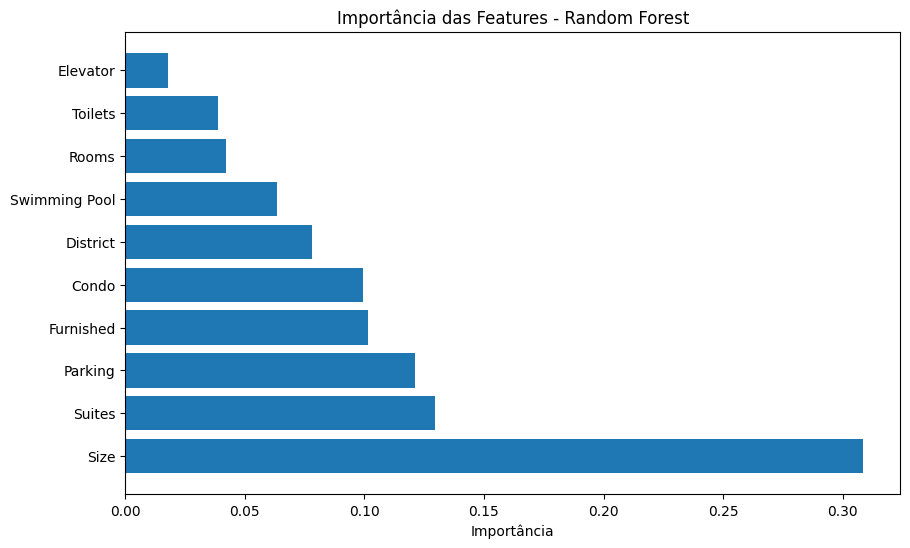

In [231]:
# Obtendo a importância das features
importances = modelo_rent.feature_importances_

# Criando um DataFrame para visualizar a importância
feature_importance_df = pd.DataFrame({'Feature': X_rent.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotando a importância das features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importância')
plt.title('Importância das Features - Random Forest')
plt.show()

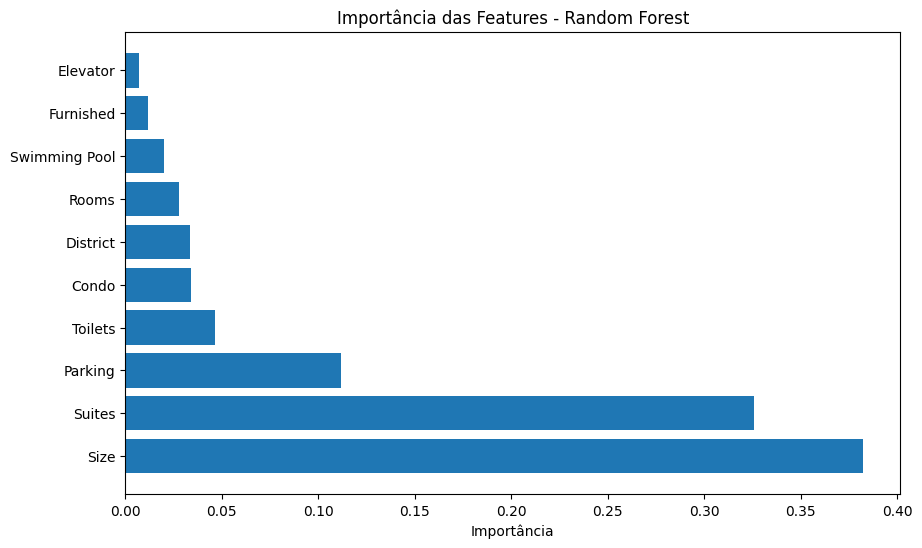

In [232]:
# Obtendo a importância das features
importances = modelo_sale.feature_importances_

# Criando um DataFrame para visualizar a importância
feature_importance_df = pd.DataFrame({'Feature': X_sale.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotando a importância das features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importância')
plt.title('Importância das Features - Random Forest')
plt.show()

In [233]:
# Avaliação do modelo para Aluguel
mae_rent = mean_absolute_error(y_test_rent, y_pred_rent)
r2_rent = r2_score(y_test_rent, y_pred_rent)

# Coeficientes da Regressão Linear
print("Coeficientes da Regressão Linear para Aluguel:")
print(f"Mean Squared Error (MAE): {mae_rent:.2f}")
print(f"R² Score: {r2_rent:.2f}")

Coeficientes da Regressão Linear para Aluguel:
Mean Squared Error (MAE): 0.24
R² Score: 0.70


In [234]:
# Avaliação do modelo para Venda
mae_sale = mean_absolute_error(y_test_sale, y_pred_sale)
r2_sale = r2_score(y_test_sale, y_pred_sale)

# Coeficientes da Regressão Linear
print("Coeficientes da Regressão Linear para Venda:")
print(f"Mean Squared Error (MAE): {mae_sale:.2f}")
print(f"R² Score: {r2_sale:.2f}")

Coeficientes da Regressão Linear para Venda:
Mean Squared Error (MAE): 34.69
R² Score: 0.87


In [235]:
# Revertendo a padronização
original_data_rent = scaler_standard.inverse_transform(data_rent_scaled)
original_data_sale = scaler_standard.inverse_transform(data_sale_scaled)

In [236]:
# Transformando data_rent e data_sale em DataFrames
original_data_rent = pd.DataFrame(original_data_rent, columns=data_rent.columns, index=data_rent.index)
original_data_sale = pd.DataFrame(original_data_sale, columns=data_sale.columns, index=data_sale.index)

In [237]:
original_data_rent

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,District
0,930.0,220.0,47.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,3.0
1,1000.0,148.0,45.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,3.0
2,1000.0,100.0,48.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,3.0
3,1000.0,200.0,48.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,3.0
4,1300.0,410.0,55.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
11205,3700.0,595.0,73.0,1.0,2.0,1.0,1.0,0.0,0.0,1.0,9.0
11206,21000.0,3000.0,208.0,4.0,4.0,3.0,3.0,1.0,1.0,1.0,9.0
11207,3800.0,710.0,55.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,9.0
11208,5000.0,2354.0,205.0,3.0,2.0,1.0,2.0,1.0,0.0,0.0,9.0


In [238]:
original_data_sale

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,District
4901,732600.0,1000.000000,74.0,1.0,2.0,1.0,2.0,1.0,0.0,1.0,88.0
4902,1990000.0,2400.000000,164.0,4.0,5.0,2.0,3.0,1.0,1.0,1.0,88.0
4903,720000.0,700.000000,70.0,2.0,2.0,1.0,1.0,1.0,0.0,1.0,88.0
4904,1680000.0,1580.000000,155.0,3.0,5.0,3.0,2.0,1.0,0.0,1.0,88.0
4905,1200000.0,900.000000,56.0,2.0,2.0,1.0,2.0,0.0,1.0,1.0,88.0
...,...,...,...,...,...,...,...,...,...,...,...
13635,265000.0,420.000000,51.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,36.0
13636,545000.0,630.000000,74.0,3.0,2.0,1.0,2.0,0.0,0.0,1.0,36.0
13637,515000.0,1100.000000,114.0,3.0,3.0,1.0,1.0,0.0,0.0,1.0,36.0
13638,345000.0,48.000000,39.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,36.0
